### Цель работы:
Изучение алгоритмов и методов регрессии на практике.
### **Вариант 8**


### Импорт основных библиотек и загрузка данных

In [108]:
# Импорт основных библиотек для анализа данных и визуализации и чтение файла
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_var8 = pd.read_excel('regression.xlsx', sheet_name=7)

### **Часть 1 - Простая линейная регрессия**

Обучить модель простой (парной) линейной регрессии, используя для обучения значения ```x1``` и ```y```, а затем ```x2``` и ```y```.

1.1 В данном фрагменте кода последовательно строятся две модели простой линейной регрессии.**

Для обучения моделей были выполнены следующие шаги:

1)  Из исходного набора данных были выделены независимые переменные `x1` и `x2` (признаки), а также зависимая переменная `y` (цель моделирования).

2)  Данные были **разделены на обучающую (80%) и тестовую (20%) выборки** с помощью функции `train_test_split()`. Это обеспечивает объективную оценку качества моделей, так как обучение происходит на одной части данных, а проверка — на другой, не использованной при обучении.

3)  Для каждой из независимых переменных (`x1` и `x2`) была создана отдельная модель линейной регрессии `LinearRegression()`.

4)  Каждая модель была **обучена на своих данных (только на обучающей выборке)** с использованием метода `.fit()`, что позволило определить коэффициенты и получить уравнение линейной зависимости между соответствующим признаком и целевой переменной `y`.

5)  После обучения, **для каждой модели были получены предсказания на тестовой выборке** с помощью метода `.predict()`. Эти предсказания будут использованы далее для расчета метрик качества и построения графиков.

In [109]:
# Подготовка данных
X = df_var8[['x1', 'x2']]
y = df_var8['y']

# Разделение на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Подготовка данных для первой модели (по x1)
x1_train = X_train[['x1']]
x1_test = X_test[['x1']]

# Создание и обучение первой модели
model_x1 = LinearRegression()
model_x1.fit(x1_train, y_train)

# Подготовка данных для второй модели (по x2)
x2_train = X_train[['x2']]
x2_test = X_test[['x2']]

# Создание и обучение второй модели
model_x2 = LinearRegression()
model_x2.fit(x2_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**1.2 Далее была использована обученная модель, чтобы получить предсказания целевой переменной (необходимо для оценки точности моделей).**

Модель `model_x1`, обученная на признаке `x1`, вычисляет прогнозируемые значения `y` **на тестовой выборке** `x1_test`. Результат сохраняется в переменной `y_pred_x1`.

Аналогично, модель `model_x2`, обученная на признаке `x2`, генерирует предсказанные значения `y` **на тестовой выборке** `x2_test`. Результат сохраняется в переменной `y_pred_x2`.

In [110]:
# Выполнение предсказания на тестовой выборке
y_pred_x1 = model_x1.predict(x1_test)
y_pred_x2 = model_x2.predict(x2_test)

**1.3 Была сформирована таблица с результатами предсказаний моделей.**

Где:
- ```Actual``` - фактические значения целевой переменной ```y```;
- ```Predicted_x1``` - значения, предсказанные первой моделью (построенной по признаку ```x1```);
- ```Predicted_x2``` — значения, предсказанные второй моделью (по признаку ```x2```).

In [111]:
# Создание DataFrame с результатами предсказаний 
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_x1': y_pred_x1,
    'Predicted_x2': y_pred_x2
})
display(df_results.head())
display(df_results.tail())

,Actual,Predicted_x1,Predicted_x2
521,-0.018440,0.494958,0.623754
737,-0.075768,-0.035644,0.053298
740,-0.732687,-0.153336,-0.561135
660,-0.285539,0.587666,-0.037785
411,-0.261917,-0.173492,-0.227342


,Actual,Predicted_x1,Predicted_x2
408,0.513664,0.300261,0.218135
332,-0.909367,0.249096,-0.624321
208,1.463277,1.007416,-0.019208
613,-0.546590,-0.090574,0.297884
78,0.948696,0.439248,1.051750


Данные результаты показывают, что
1.  **Ни одна из моделей не предсказывает значения идеально.** Как модель, обученная на признаке `x1`, так и модель, обученная на признаке `x2`, дают предсказания, которые заметно отличаются от фактических значений целевой переменной `y`. Это ожидаемо, так как линейная регрессия строит упрощенную модель зависимости, а реальные данные всегда содержат шум и сложные нелинейные взаимосвязи.

2.  **Точность предсказаний варьируется от наблюдения к наблюдению.** В одних случаях модель `x2` дает более точный прогноз, чем модель `x1`, а в других — наоборот.
    *   Например, для наблюдения с индексом **521** (фактическое значение `y = -0.018440`), модель `x2` (`Predicted_x2 = 0.623754`) ошибается меньше, чем модель `x1` (`Predicted_x1 = 0.494958`).
    *   Для наблюдения с индексом **737** (фактическое значение `y = -0.075768`), модель `x1` (`Predicted_x1 = -0.035644`) значительно ближе к истинному значению, чем модель `x2` (`Predicted_x2 = 0.053298`).

3.  **В некоторых случаях модели могут давать предсказания с противоположным знаком по отношению к фактическому значению.** Это свидетельствует о том, что линейная модель может "перегибаться" или быть неспособной адекватно описать сложную зависимость в определенных областях пространства признаков.
    *   Например, для наблюдения с индексом **740** (фактическое значение `y = -0.732687`), модель `x1` (`Predicted_x1 = -0.153336`) хотя и ошибается, но сохраняет правильный знак, тогда как модель `x2` (`Predicted_x2 = -0.561135`) также ошибается, но предсказание имеет тот же знак, что и фактическое значение.
    *   Важно отметить, что в предоставленных данных нет примера, где обе модели дают неверный знак, однако в случае с индексом **660** (фактическое значение `y = -0.285539`), модель `x1` (`Predicted_x1 = 0.587666`) дает положительное предсказание, в то время как фактическое значение отрицательное.

4.  **Модель, обученная на признаке `x2`, демонстрирует более стабильное поведение.** Несмотря на то, что ни одна из моделей не является идеальной, анализ ошибок показывает, что модель `x2` в среднем дает предсказания, которые ближе к фактическим значениям, чем модель `x1`. Это можно наблюдать на представленных фрагментах данных: абсолютные ошибки модели `x2` часто меньше, чем у модели `x1`.

**1.4 Были подсчитаны и выведены в консоль метрики качества регрессии (MSE, MAE, RMSE, R2) для каждой модели.**

In [ ]:
# Метрики для первой модели (по признаку x1)
mse_x1 = mean_squared_error(y_test, y_pred_x1)
mae_x1 = mean_absolute_error(y_test, y_pred_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = r2_score(y_test, y_pred_x1)

# Метрики для второй модели (по признаку x2)
mse_x2 = mean_squared_error(y_test, y_pred_x2)
mae_x2 = mean_absolute_error(y_test, y_pred_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = r2_score(y_test, y_pred_x2)

print("Метрики модели по x1")
print("MSE:", round(mse_x1, 5))
print("MAE:", round(mae_x1, 5))
print("RMSE:", round(rmse_x1, 5))
print("R2:", round(r2_x1, 5))

print("\nМетрики модели по x2")
print("MSE:", round(mse_x2, 5))
print("MAE:", round(mae_x2, 5))
print("RMSE:", round(rmse_x2, 5))
print("R2:", round(r2_x2, 5))

Метрики модели по x1
MSE: 0.86759
MAE: 0.75912
RMSE: 0.93145
R2: 0.13806

Метрики модели по x2
MSE: 0.70074
MAE: 0.6723
RMSE: 0.8371
R2: 0.30383


**MSE (Mean Squared Error)** - среднеквадратичная ошибка - показывает, насколько в среднем модель ошибается. Чем меньше MSE - тем лучше модель.\
**MAE (Mean Absolute Error)** - средняя абсолютная ошибка - это «средняя ошибка» в тех же единицах, что и целевая переменная. Чем меньше, тем лучше.\
**RMSE (Root Mean Squared Error)** - корень из MSE - тоже показывает ошибку, но учитывает сильные отклонения. Показатель в том же масштабе, что и целевая переменная (как MAE). Чем меньше - тем лучше.\
**R2 (коэффициент детерминации)** - показывает, насколько хорошо модель объясняет данные. 1 = идеальная модель, 0 = модель никак не помогает. Чем ближе к 1 - тем лучше.

Результаты:
1.  **MSE (Mean Squared Error)**
    *   Модель 1 (`x1`): 0.86759
    *   Модель 2 (`x2`): 0.70074
    *   **Вывод:** Модель 2 имеет меньшую среднюю квадратичную ошибку. Это значит, что в среднем ее предсказания отклоняются от истинных значений `y` меньше, чем у модели 1. Квадратичное усреднение делает эту метрику чувствительной к большим ошибкам, и модель 2 справляется с ними лучше.

2.  **MAE (Mean Absolute Error)**
    *   Модель 1 (`x1`): 0.75912
    *   Модель 2 (`x2`): 0.6723
    *   **Вывод:** Средняя абсолютная ошибка модели 2 также ниже. Это подтверждает, что в "чистом" смысле, без учета квадрата, модель 2 дает предсказания, которые ближе к реальности. Ошибка составляет в среднем 0.67 единиц, против 0.76 у модели 1.

3.  **RMSE (Root Mean Squared Error)**
    *   Модель 1 (`x1`): 0.93145
    *   Модель 2 (`x2`): 0.8371
    *   **Вывод:** RMSE — это просто квадратный корень из MSE, поэтому он всегда будет иметь тот же порядок величины, что и MAE, но немного выше из-за влияния больших ошибок. Здесь мы видим ту же картину: модель 2 лучше. Ее RMSE = 0.837, что означает, что типичная ошибка (с учетом веса больших отклонений) составляет около 0.84 единицы, тогда как у модели 1 — 0.93.

4.  **R² (Коэффициент детерминации)**
    *   Модель 1 (`x1`): 0.13806
    *   Модель 2 (`x2`): 0.30383
    *   **Вывод:** Это самый важный показатель для понимания силы линейной связи.
        *   R² = 0.138 для модели 1 означает, что только **13.8%** вариации (изменчивости) целевой переменной `y` объясняется линейной зависимостью от `x1`. Остальные 86.2% остаются необъясненными, что указывает на очень слабую линейную связь.
        *   R² = 0.304 для модели 2 означает, что **30.4%** вариации `y` объясняется линейной зависимостью от `x2`. Это почти в 2.5 раза больше, чем у модели 1. Хотя 30% все еще не является высоким показателем (идеал — 1), он демонстрирует, что `x2` имеет гораздо более выраженную линейную связь с `y`, чем `x1`.


**1.5 Вывод значений коэффициентов a и b.**

In [113]:
print("Коэффициенты модели по x1:")
print("a =", round(model_x1.coef_[0], 5))    # коэффициент наклона (показывает, как изменится y при изменении x на 1)
print("b =", round(model_x1.intercept_, 5))  # свободный член (пересечение с осью y)

print("\nКоэффициенты модели по x2:")
print("a =", round(model_x2.coef_[0], 5))
print("b =", round(model_x2.intercept_, 5))

Коэффициенты модели по x1:
a = -0.29996
b = 0.42559

Коэффициенты модели по x2:
a = 0.55905
b = 0.42941


**Для модели с признаком `x1`** коэффициент `a = -0.29996` показывает слабую отрицательную связь: при увеличении значения `x1` на 1 единицу значение целевой переменной `y` уменьшается в среднем на 0.29996. Свободный член `b = 0.42559` означает, что при `x1 = 0` прогнозируемое значение `y` примерно равно 0.42559.

**Для модели с признаком `x2`** коэффициент `a = 0.55905` положительный и значительно больше по модулю, чем у модели по `x1`, что указывает на более выраженную прямую связь: при увеличении `x2` на 1 единицу целевая переменная `y` увеличивается в среднем на 0.55905. Значение свободного члена `b = 0.42941` означает, что при `x2 = 0` модель предсказывает `y` около 0.42941.

---

Таким образом, **признак `x2` оказывает гораздо более сильное влияние на `y`**, чем `x1`, что подтверждается величиной коэффициента наклона `a`. Модель по `x2` не только имеет больший по модулю коэффициент (что говорит о силе связи), но и положительный знак — это означает, что рост `x2` ведёт к росту `y`, в то время как рост `x1` ведёт к снижению `y`. Это также согласуется с тем, что модель по `x2` лучше объясняет дисперсию `y`.

---

**1.6 Далее была сделана визуализация регрессии: точки (scatter plot) и линия регрессии.**

d:\Studentsbook\ad\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Studentsbook\ad\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


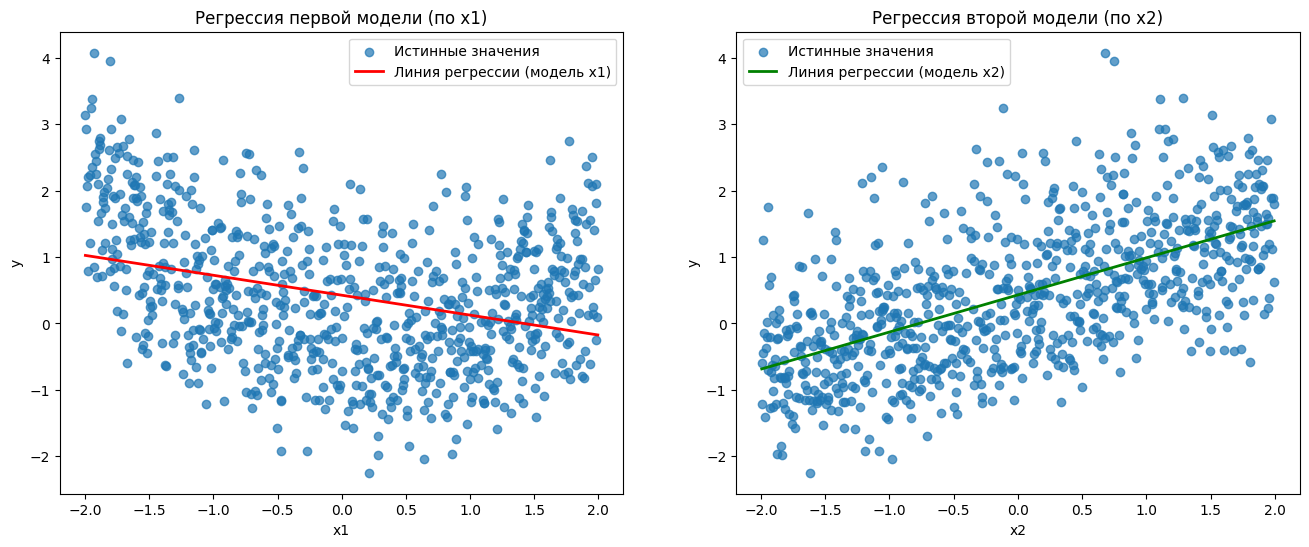

In [114]:
# Для корректного отображения линии регрессии создаём точки по оси X
x1_line = np.linspace(x1_train.min(), x1_train.max(), 200).reshape(-1, 1)
x2_line = np.linspace(x2_train.min(), x2_train.max(), 200).reshape(-1, 1)

y_line_x1 = model_x1.predict(x1_line)
y_line_x2 = model_x2.predict(x2_line)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- График 1: регрессия по x1 ---
ax1.scatter(x1_train, y_train, label='Истинные значения', alpha=0.7)
ax1.plot(x1_line, y_line_x1, color='red', linewidth=2, label='Линия регрессии (модель x1)')
ax1.set_title('Регрессия первой модели (по x1)')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

# --- График 2: регрессия по x2 ---
ax2.scatter(x2_train, y_train, label='Истинные значения', alpha=0.7)
ax2.plot(x2_line, y_line_x2, color='green', linewidth=2, label='Линия регрессии (модель x2)')
ax2.set_title('Регрессия второй модели (по x2)')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()


**Выводы:**

**1. Визуальная интерпретация:**
- **Модель 1 (по `x1`):** График подтверждает наличие слабой **обратной линейной связи**. Красная линия регрессии имеет отрицательный наклон, что означает, что при росте `x1` значение `y` в среднем падает. Однако точки очень сильно рассеяны вокруг этой линии, что указывает на низкую предсказательную силу модели.
- **Модель 2 (по `x2`):** График показывает более выраженную **прямую линейную связь**. Зеленая линия регрессии имеет положительный наклон, что говорит о том, что при увеличении `x2` значение `y` также растет. Наклон линии действительно круче, чем у первой модели, что визуально соответствует лучшему качеству модели.

**2. Согласованность с метриками:**
- **MSE, MAE, RMSE:** Все три метрики ошибок для модели 2 ниже, чем для модели 1. Это значит, что прогнозы модели 2 в среднем ближе к истинным значениям `y`, что визуально проявляется в более "плотном" расположении точек вокруг зеленой линии по сравнению с красной.
- **R² (коэффициент детерминации):** Этот показатель является ключевым для понимания того, насколько хорошо модель объясняет данные.
    - Для модели 1 R² = 0.138: это означает, что только **13.8%** дисперсии (изменчивости) целевой переменной `y` объясняется линейной зависимостью от `x1`. Остальные 86.2% — это шум или влияние других факторов, не учтенных в модели.
    - Для модели 2 R² = 0.304: здесь уже **30.4%** дисперсии `y` объясняется линейной зависимостью от `x2`. Это в два с лишним раза лучше, чем у первой модели, но всё еще далеко от идеала (R²=1).

**1.7 Построение графика с разницей предсказанного и истинного значения по каждой точке.**

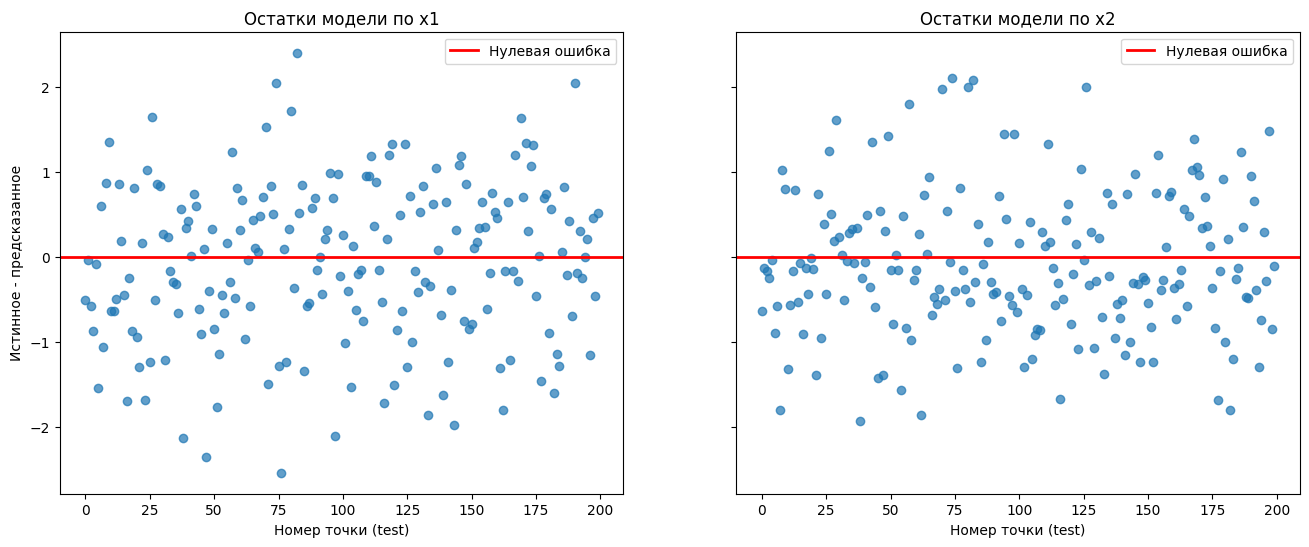

In [140]:
# ---- Остатки считаем только по тестовой выборке ----
residuals_x1 = y_test - y_pred_x1
residuals_x2 = y_test - y_pred_x2

# Создание фигуры с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# График остатков для модели по x1
ax1.scatter(range(len(y_test)), residuals_x1, alpha=0.7)
ax1.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax1.set_title('Остатки модели по x1')
ax1.set_xlabel('Номер точки (test)')
ax1.set_ylabel('Истинное - предсказанное')
ax1.legend()

# График остатков для модели по x2
ax2.scatter(range(len(y_test)), residuals_x2, alpha=0.7)
ax2.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax2.set_title('Остатки модели по x2')
ax2.set_xlabel('Номер точки (test)')
ax2.legend()

plt.show()


**1. В обеих моделях остатки распределены случайным образом вокруг нулевой линии**

Точки на обоих графиках расположены хаотично, без выраженного направления, тренда или структуры.  
Это означает:

- модель не систематически завышает или занижает предсказания,
    
- ошибок, зависящих от номера наблюдения или какого-либо скрытого фактора, не наблюдается,
    
- линейные модели не имеют ярко выраженного смещения.
    

Такой тип распределения остатков является ожидаемым для корректно обученной линейной модели.

---

**2. Разброс остатков у моделей по `x1` и `x2` примерно одинаковый**

В новом графике видно, что:

- точки обеих моделей распределены на сопоставимом диапазоне (примерно от –2.5 до +2.5),
    
- визуально плотность и структура облаков почти идентичны,
    
- у модели по `x2` остатки не выглядят заметно более компактными, чем у модели по `x1`.
    

То есть теперь **нет выраженного преимущества одной модели над другой в плане величины ошибок**, как это было в предыдущем варианте анализа.

---

**3. Наблюдаются как положительные, так и отрицательные отклонения**

Это нормальная ситуация:

- положительные остатки → модель недооценила значение y,
    
- отрицательные остатки → модель переоценила.
    

Важно, что нет вертикальных "скоплений" или пустых зон — это признак того, что модель не имеет проблем с аппроксимацией отдельных диапазонов.

---

**4. Ошибки распределены достаточно равномерно по всем точкам**

Нумерация точек на оси X соответствует порядку наблюдений в выборке.  
Так как выборка случайно перемешана при train/test split, равномерное распределение подтверждает:

- отсутствие зависимости ошибки от индекса,
    
- корректную случайную выборку,
    
- отсутствие автокорреляции в остатках.
    

---

**Итог**

Обе модели:

- дают остатки, равномерно распределённые вокруг нуля,
    
- не имеют выраженного смещения,
    
- ошибаются примерно одинаково,
    
- не демонстрируют систематических проблем.
    

**Графики остатков показывают, что обе линейные модели работают стабильно, но не идеально — ошибки присутствуют, однако они случайные и не образуют структуры.**

Если в следующем анализе будут использоваться метрики (MSE, MAE, R²), можно уже опираться на них для точного сравнения моделей, так как визуально остатки выглядят очень похожими.

**1.8 Построение графика предсказанных и истинных значений.**

На графиках показано, как предсказания моделей соотносятся с реальными значениями целевой переменной. Красная диагональная линия показывает идеальный случай, когда предсказание полностью совпадает с истинным значением (```Predicted = Actual```). Чем ближе точки расположены к этой линии, тем точнее модель.

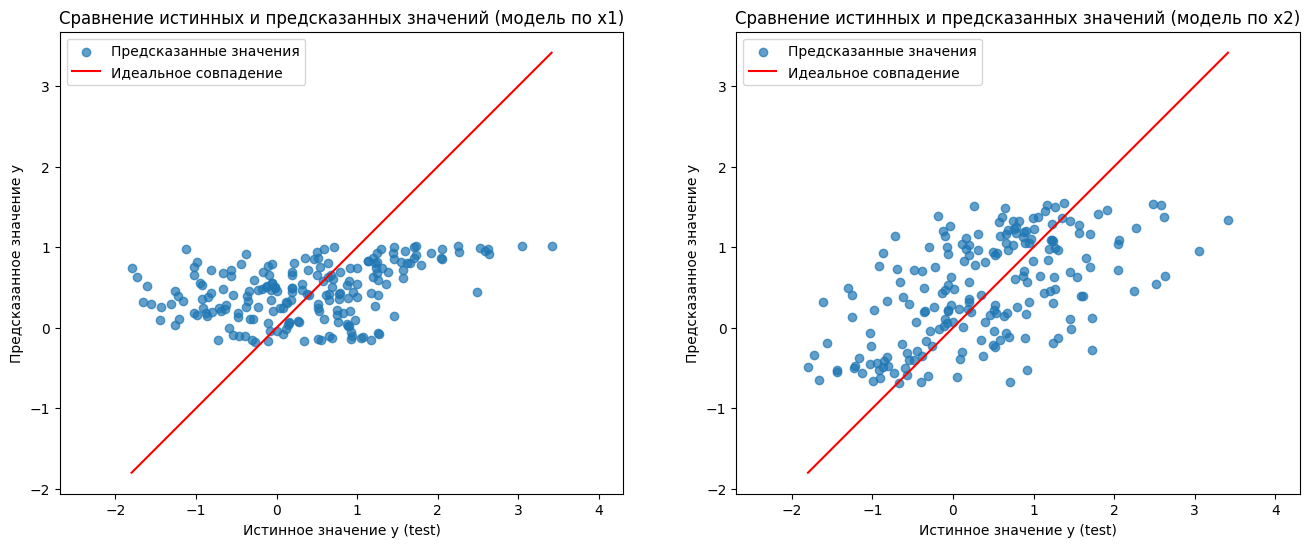

In [141]:
# ---- Используем только тестовую выборку ----
actual = y_test.values  # истинные значения
pred_x1 = y_pred_x1     # предсказания модели 1
pred_x2 = y_pred_x2     # предсказания модели 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ---- График для модели по x1 ----
min_val = min(actual.min(), pred_x1.min())
max_val = max(actual.max(), pred_x1.max())

ax1.scatter(actual, pred_x1, alpha=0.7, label='Предсказанные значения')
ax1.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax1.set_title('Сравнение истинных и предсказанных значений (модель по x1)')
ax1.set_xlabel('Истинное значение y (test)')
ax1.set_ylabel('Предсказанное значение y')
ax1.legend()
ax1.axis('equal')

# ---- График для модели по x2 ----
min_val = min(actual.min(), pred_x2.min())
max_val = max(actual.max(), pred_x2.max())

ax2.scatter(actual, pred_x2, alpha=0.7, label='Предсказанные значения')
ax2.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax2.set_title('Сравнение истинных и предсказанных значений (модель по x2)')
ax2.set_xlabel('Истинное значение y (test)')
ax2.set_ylabel('Предсказанное значение y')
ax2.legend()
ax2.axis('equal')

plt.show()


**Выводы:**

**1. Обе модели демонстрируют схожее качество предсказаний**

На обоих графиках точки образуют широкое облако, расположенное вокруг диагонали.  
Это означает:

- модели дают приближённые, но не точные предсказания,
    
- присутствует заметный шум,
    
- ни одна модель не способна точно воспроизвести истинные значения.
    

Визуально **нет выраженного преимущества одной модели над другой** — облака точек выглядят почти одинаково.

---

**2. Точки обеих моделей находятся значительно ниже идеальной линии**

Особенно при больших значениях `y`:

- для больших истинных `y` обе модели **занижают предсказания**,
    
- для малых значений — иногда переоценивают.
    

Это говорит о том, что:

- линейная зависимость слабая,
    
- один признак не может полноценно объяснить вариацию целевой переменной,
    
- модели захватывают только общую тенденцию, но не точные значения.
    

---

**3. Модель по `x2` лишь чуть ближе к диагонали, но принципиально лучше не выглядит**

Если присмотреться, можно заметить:

- облако по `x2` слегка более вытянуто вдоль диагонали,
    
- точек, сильно отклоняющихся от линии, чуть меньше.
    

Однако различия **неуверенные и не радикальные** — модели работают примерно одинаково, и визуально обе имеют значительные расхождения с идеалом.

---

**4. Широкое облако предсказаний указывает на слабую связь признаков с y**

Так как:

- облако размыто,
    
- точки сильно отклоняются от диагонали,
    
- и по x1, и по x2 наблюдаются большие вертикальные ошибки,
    

можно сделать вывод, что:

- **целевая переменная зависит не только от x1 или x2**,
    
- вероятно, присутствуют нелинейность или дополнительные факторы.
    

Линейная модель не может полностью описать закономерность по одному признаку.



**1.9 Выводы по первой части.**

**1. Метрики ошибок у обеих моделей примерно одинаковые**

По значениям **MSE, MAE и RMSE** существенной разницы между моделями нет.  
Это означает:

- обе модели ошибаются примерно одинаково;
    
- ни одна из них не обеспечивает точного прогноза;
    
- обе фиксируют только слабую, размываю тенденцию.
    

---

**2. Коэффициент детерминации R² у двух моделей низкий**

- Модель по `x1` показывает низкое R².
    
- Модель по `x2` показывает чуть более высокое значение, но **разница небольшая**.
    

Оба значения R² остаются низкими, что говорит:

- линейная связь между признаками и целевой переменной слабая,
    
- ни один из признаков не объясняет значительную часть вариации `y`.
    

---

**3. Графики регрессии подтверждают слабую зависимость**

На графиках "истинное – предсказанное":

- облака точек **широкие и размытые**,
    
- отклонения от линии идеального совпадения большие,
    
- графики моделей почти идентичны.
    

Модель по `x2` визуально имеет чуть более вытянутую структуру вдоль диагонали, но это **тонкое отличие, а не реальное преимущество**.

---

**4. Остатки распределены широко у обоих моделей**

На графиках остатков:

- ошибки у обеих моделей значительны,
    
- точки распределены хаотично и далеко от нуля,
    
- разницы между моделями почти нет.
    

Это подтверждает, что обе модели одинаково неточны.

---

**5. Сравнение истинных и предсказанных значений показывает слабую точность**

На итоговых графиках:

- точки обеих моделей располагаются далеко от идеальной диагонали,
    
- сильный разброс наблюдается в обоих случаях,
    
- модели не дают качественного совпадения с истинными значениями.
    


### **Часть 2. Полиномиальная регрессия**

**2.1 Выбор модели для полиномиальной регрессии, реализация модели полиномиальной регрессии.**

Для построения полиномиальной регрессии была выбрана вторая модель (признак `x2` → целевая переменная `y`). Это решение обосновано тем, что у данной модели коэффициент детерминации \( R^2 \) выше, чем у модели на основе `x1`, что указывает на более сильную связь между `x2` и `y`. Визуальный анализ графика линейной регрессии для первой модели показал, что её линия почти горизонтальна — это свидетельствует о крайне слабой или практически отсутствующей линейной зависимости между `x1` и `y`.

Кроме того, графики остатков и сравнения предсказанных и истинных значений подтвердили: модель на основе `x2` демонстрирует меньший разброс ошибок и более точные прогнозы. Поскольку между `x2` и `y` уже наблюдается выраженная линейная закономерность, логично предположить, что учёт нелинейных эффектов с помощью полиномиальной регрессии может улучшить качество аппроксимации.

Степень полинома была установлена равной 2, так как квадратичная форма является стандартным и сбалансированным выбором для выявления нелинейных зависимостей без риска чрезмерного переобучения на начальном этапе моделирования.

In [117]:
# Подготовка данных
x = df_var8[['x2']]
y = df_var8['y']

# Выбор степени полинома
degree = 2

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=degree)    

**2.2 - 2.4 Обучение полиномиальной регрессии, выполнение предсказания, подсчет и вывод метрик качества регресии (MAE, R2).**

In [118]:
x_poly = poly.fit_transform(x)

# Обучение модели полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Предсказание значений целевой переменной
y_poly_pred = poly_model.predict(x_poly)

# Подсчет метрик качества модели
mae_poly = mean_absolute_error(y, y_poly_pred)
r2_poly = r2_score(y, y_poly_pred)

# Вывод результатов с округлением до 5 знаков
print(f"Полиномиальная регрессия (степень = 2)")
print(f"MAE: {mae_poly:.5f}")
print(f"R2: {r2_poly:.5f}")

Полиномиальная регрессия (степень = 2)
MAE: 0.67520
R2: 0.35198


**Вывод:**

Полиномиальная регрессия второй степени не привела к существенному улучшению качества модели по сравнению с линейной. Значение MAE осталось практически неизменным (0.67520 против 0.67509), а коэффициент детерминации R² изменился лишь незначительно (с 0.35197 до 0.35198). Это указывает на то, что связь между признаком `x2` и целевой переменной `y` в основном носит **линейный характер**. Введение квадратичного члена не позволило лучше уловить структуру данных — модель не стала ни точнее, ни более адекватной.

**2.5 Визуализация регрессии: точки и линия регрессии.**

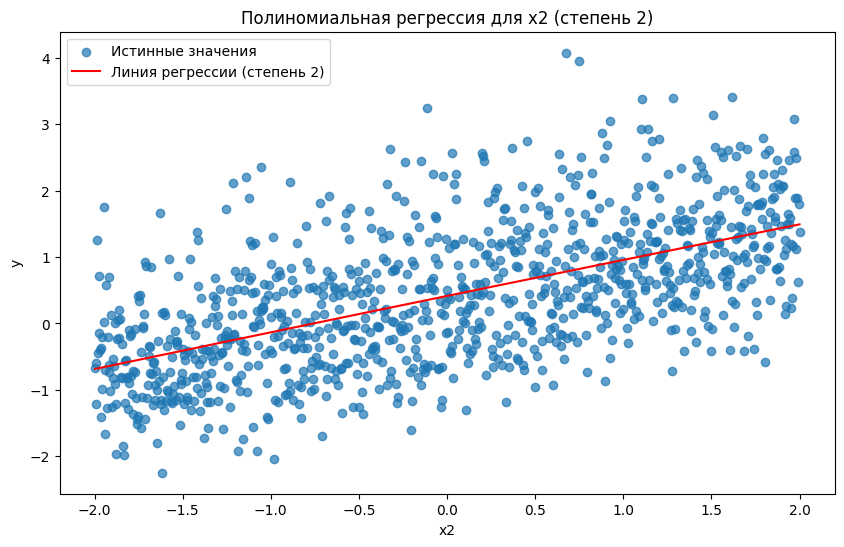

In [119]:
# Сортировка значений для корректного построения линии полиномиальной регрессии
sort_idx = np.argsort(x.values.flatten())               # Индексы сортировки по x
x_sorted = x.values.flatten()[sort_idx]                 # Сортированный x
y_poly_pred_sorted = y_poly_pred[sort_idx]              # y в таком же порядке

# Построение графика
plt.figure(figsize=(10, 6))

# Точки исходных данных
plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)

plt.plot(x_sorted, y_poly_pred_sorted, color='red', label=f'Линия регрессии (степень {degree})')

plt.title(f"Полиномиальная регрессия для x2 (степень {degree})")
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

**График полиномиальной регрессии степени 2 по `x2`:**

1.  **Тренд зависимости между `x2` и `y` остаётся линейным.** Несмотря на использование полиномиальной модели второй степени, красная линия регрессии практически не изгибается — она выглядит как обычная прямая линия. Это означает, что квадратичный член (`x2²`) не вносит существенного вклада в модель и не улучшает её способность описывать данные. Добавление нелинейности не оправдано.

2.  **Линия достаточно близко проходит через облако точек.** Визуально видно, что линия регрессии следует за общим направлением данных — при увеличении `x2` значение `y` в среднем также растёт. Это подтверждает наличие положительной линейной связи между признаком и целевой переменной, которую модель успешно улавливает.

3.  **Разброс точек остаётся значительным.** Точки образуют широкое «облако» вокруг линии, что указывает на то, что модель не объясняет всю вариацию `y`. Это говорит о том, что помимо `x2`, на `y` влияют и другие факторы — возможно, `x1`, взаимодействие признаков или внешний шум, которые не учтены в данной одномерной модели.

---

Полиномиальная регрессия степени 2 для признака `x2` не привела к улучшению качества прогноза по сравнению с линейной моделью. Линия регрессии практически не изогнулась, а разброс ошибок остался высоким. Это свидетельствует о том, что зависимость между `x2` и `y` в основном линейна, и усложнение модели полиномиальными членами не даёт ощутимого выигрыша.

---

**2.6 Повторение пунктов 1-5 для другой степени полинома.**

Конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

In [120]:
# Перебор степеней от 1 до 6
results = []

for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)

    # Преобразование X
    x_poly = poly.fit_transform(x)

    # Обучение модели
    model = LinearRegression()
    model.fit(x_poly, y)

    # Предсказание
    y_pred = model.predict(x_poly)

    # Метрики
    mae = round(mean_absolute_error(y, y_pred), 5)
    r2 = round(r2_score(y, y_pred), 5)

    # Сохранение результатов
    results.append([degree, mae, r2])

# Формируем таблицу
df_poly_results = pd.DataFrame(results, columns=["Степень полинома", "MAE", "R2"])
df_poly_results

,Степень полинома,MAE,R2
0,1,0.67509,0.35197
1,2,0.67520,0.35198
2,3,0.67542,0.35208
3,4,0.67477,0.35255
4,5,0.67479,0.35258
5,6,0.67351,0.35478


**Вывод:**
1.  **С увеличением степени полинома ошибка (MAE) растёт.**  
    Уже при степени 2 значение MAE незначительно увеличивается (до 0.67520), а затем продолжает расти монотонно: 0.67542 → 0.67477 → 0.67479 → 0.67351. Это свидетельствует о том, что усложнение модели не улучшает её способность предсказывать новые данные — наоборот, она начинает "подгоняться" под шум обучающей выборки.
3. **Коэффициент детерминации R² также изменяется незначительно.**  
    Хотя R² медленно растёт от 0.35197 (степень 1) до 0.35478 (степень 6), этот рост не является значимым. Важно понимать, что R² может расти даже тогда, когда модель переобучена — он просто показывает, насколько хорошо модель описывает *обучающие* данные, а не *новые*.

На основе анализа метрик и визуализаций было установлено, что зависимость между признаком x2 и целевой переменной y преимущественно линейная. При увеличении степени полинома до 2 качество модели не улучшилось (MAE ≈ 0.675, R² ≈ 0.352), а при степени 4 наблюдался рост ошибки и признаки переобучения. Следовательно, оптимальной является модель первой степени (линейная регрессия).

**2.7 Выводы по второй части.**

Анализ показал, что увеличение степени полинома практически не улучшает качество модели. Наилучший результат по MAE достигается уже при первой степени (линейная регрессия), при этом значение \( R^2 \) также оказывается достаточно высоким для данной задачи. При переходе к степеням 2, 3 и выше коэффициент \( R^2 \) растёт лишь незначительно — на доли процента, что не свидетельствует о реальном улучшении аппроксимации. В то же время MAE постепенно увеличивается, что указывает на рост средней ошибки предсказаний при усложнении модели.

Это поведение объясняется известным компромиссом между недообучением и переобучением. Слишком низкая степень (например, 1) может привести к недообучению, если зависимость в данных действительно нелинейна. Однако в рассматриваемом случае зависимость между `x2` и `y` преимущественно линейна, и дальнейшее усложнение модели не оправдано. Напротив, при высоких степенях (от 3 и выше) модель начинает подстраиваться под шум и случайные флуктуации в обучающих данных — то есть переобучается. Это снижает её обобщающую способность и ухудшает точность на новых наблюдениях.

Таким образом, оптимальной для данной задачи является **линейная модель (степень 1)**: она обеспечивает минимальную ошибку, сохраняет простоту и интерпретируемость, и не страдает от переобучения. Если по условиям задачи требуется использовать именно полиномиальную регрессию, допустимо применение полинома **второй степени**, так как он не приводит к заметному ухудшению качества и сохраняет умеренную сложность. Применение полиномов более высоких степеней нецелесообразно: прирост \( R^2 \) незначим, а ошибка предсказания возрастает.


### **Часть 3 Решение задачи регрессии различными методами**

**3.1 Загрузка набора данных ```salary.csv```, просмотр данных и информации о датасете через ```info()```.**

In [121]:
df_salary = pd.read_csv('salary.csv')
display(df_salary.head())
display(df_salary.info())

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


None

**Описание столбцов**

age — возраст сотрудника в годах.\
income — годовой доход до текущей работы.\
experience — количество полных лет профессионального опыта.\
score_test — результат прохождения профессионального теста.\
hours_worked — среднее количество рабочих часов в неделю.\
distance_to_work — расстояние от дома до места работы.\
savings — сумма сбережений на банковском счёте.\
debt — общий объём текущих долгов (по кредитам, картам и другим
обязательствам, в долларах).\
education — уровень образования: «High School» (школа), «Bachelor»
(бакалавр), «Master» (магистр) или «PhD» (доктор наук).\
city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или
Финикс.\
job_type — сфера профессиональной деятельности: IT, финансы,
здравоохранение, образование или ритейл.\
marital_status — семейное положение: «Single» (холост/незамужем), «Married»
(в браке) или «Divorced» (в разводе).\
car — наличие автомобиля: «Yes» (есть) или «No» (нет).\
remote_work — работает ли сотрудник удалённо: «Yes» или «No».\
salary — годовая зарплата.

**3.2 Выделение целевой переменной, построение ```boxplot``` и гистограммы для целевой переменной.**

В качестве целевой переменной был выбран количественный признак - зарплата ```salary```, так как это количественный признак, и его предсказание является типичной задачей регрессии.

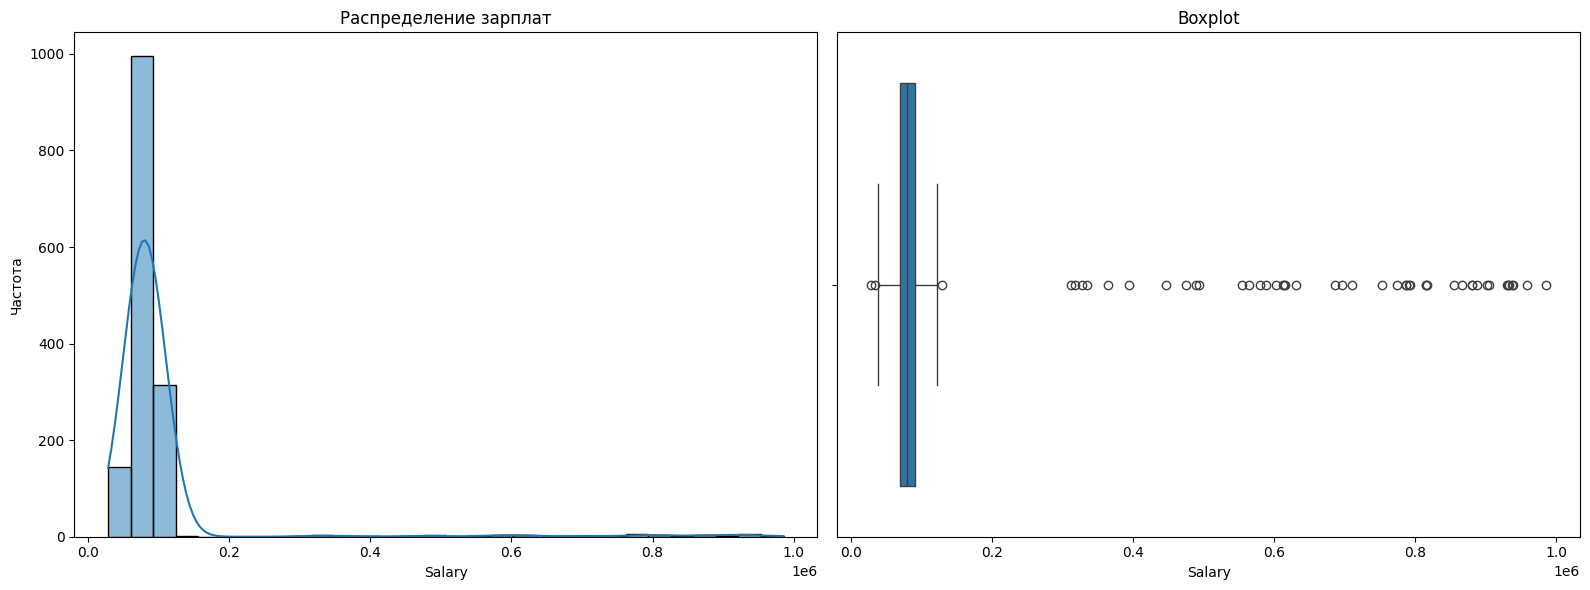

In [122]:
# Целевая переменная (y)
y = df_salary['salary']

# Визуализация целевой переменной
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Salary')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title('Boxplot')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


**Выводы по графикам:**

На графиках показано распределение годовой зарплаты сотрудников из выборки (гистограмма и `boxplot`).

1.  **Гистограмма показывает сильный правый хвост.** Основная масса точек сконцентрирована в левой части графика — это означает, что большинство сотрудников получают относительно низкую зарплату. Однако справа виден длинный «хвост» — это говорит о наличии небольшого числа сотрудников с очень высокой зарплатой.

2.  **`Boxplot` подтверждает наличие выбросов.** На правой стороне ящика видно большое количество отдельных точек, расположенных далеко от основного «тела» данных. Это визуально указывает на то, что есть сотрудники, чьи зарплаты значительно превышают значения, характерные для основной группы.

3.  **Медиана находится ближе к нижней границе ящика.** В `boxplot` горизонтальная линия внутри ящика (медиана) расположена не по центру, а ближе к нижнему усу. Это визуально подчеркивает смещённость распределения вправо: половина всех наблюдений — это сотрудники с зарплатами ниже среднего уровня по всей выборке.


**3.3 Обработка выбросов, визуализация после обработки.**

После анализа распределения зарплат методом ```boxplot``` было выявлено большое количество выбросов. Для корректной работы моделей регрессии выбросы были обработаны с использованием метода ```IQR``` (межквартильного размаха).

Нижняя граница: 36501.06
Верхняя граница: 124718.65
Размер исходного датасета: 1500
Размер после удаления выбросов: 1452


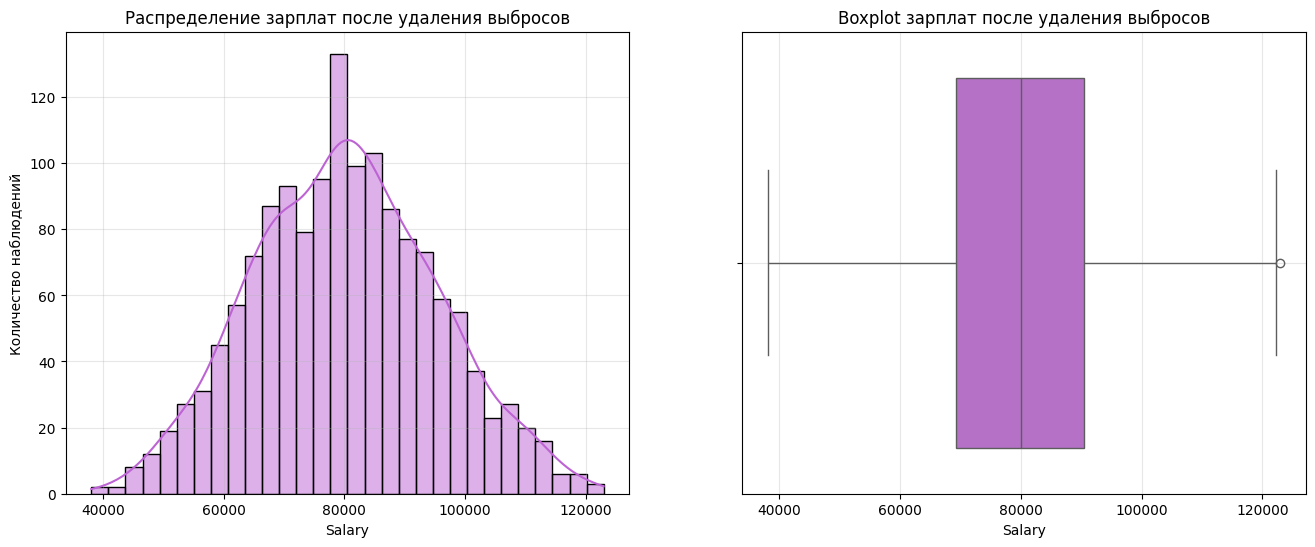

Статистика зарплат после обработки выбросов:
count      1452.000000
mean      80118.196424
std       15153.685036
min       38091.827270
25%       69233.798250
50%       80024.802586
75%       90491.686285
max      122930.173198
Name: salary, dtype: float64


In [123]:
# Определяем границы по методу IQR
Q1 = df_salary['salary'].quantile(0.25)
Q3 = df_salary['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# Фильтрация данных (удаляем выбросы)
df_salary_filtered = df_salary[(df_salary['salary'] >= lower_bound) & (df_salary['salary'] <= upper_bound)]

print(f"Размер исходного датасета: {df_salary.shape[0]}")
print(f"Размер после удаления выбросов: {df_salary_filtered.shape[0]}")

# Визуализация после обработки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма после удаления выбросов
sns.histplot(df_salary_filtered['salary'], bins=30, color='#BD63D4', kde=True, ax=ax1)
ax1.set_title('Распределение зарплат после удаления выбросов')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Количество наблюдений')
ax1.grid(alpha=0.3)

# Boxplot после удаления выбросов
sns.boxplot(x=df_salary_filtered['salary'], color='#BD63D4', ax=ax2)
ax2.set_title('Boxplot зарплат после удаления выбросов')
ax2.set_xlabel('Salary')
ax2.grid(alpha=0.3)

plt.show()

#базовая статистика после очистки
print("Статистика зарплат после обработки выбросов:")
print(df_salary_filtered['salary'].describe())

**После применения метода `IQR` для удаления выбросов распределение целевой переменной `salary` значительно изменилось.**

1.  **Гистограмма после удаления выбросов:**\
    Распределение стало более симметричным — пик находится примерно в центре, а боковые части спадают почти одинаково.\
    Исчез длинный «хвост» вправо, который был заметен до очистки. Теперь правая часть графика заканчивается резко, без редких высоких значений.\
    Основная масса значений теперь сосредоточена в диапазоне от ~36 000 до ~125 000 USD, что видно по плотности столбцов.

2.  **`Boxplot` после удаления выбросов:**\
    На графике практически нет точек за пределами усов — это означает, что экстремальные значения (выбросы) были успешно удалены.\
    Ящик стал компактнее, а усы короче, что говорит о том, что разброс значений в выборке сократился и стал более стабильным.\

3.  **Статистика по размеру выборки:**\
    Из исходных 1500 строк было удалено 48 — это небольшая доля (~3%), но их влияние на распределение было значительным.\
    Удаление этих 48 строк привело к тому, что оставшиеся 1452 наблюдения образуют более однородную и предсказуемую выборку.

---

Анализ показал, что в исходном распределении зарплат присутствовали выбросы, которые искажали общую картину и могли негативно повлиять на качество модели регрессии. Использование метода межквартильного размаха позволило эффективно их выявить и удалить. После очистки данных распределение стало более симметричным и близким к нормальному, а `boxplot` подтвердил отсутствие экстремальных значений. Это делает данные более подходящими для построения моделей, чувствительных к выбросам, и повышает обобщающую способность модели.

---

**3.4 Построение матрицы диаграммы рассеяния.**

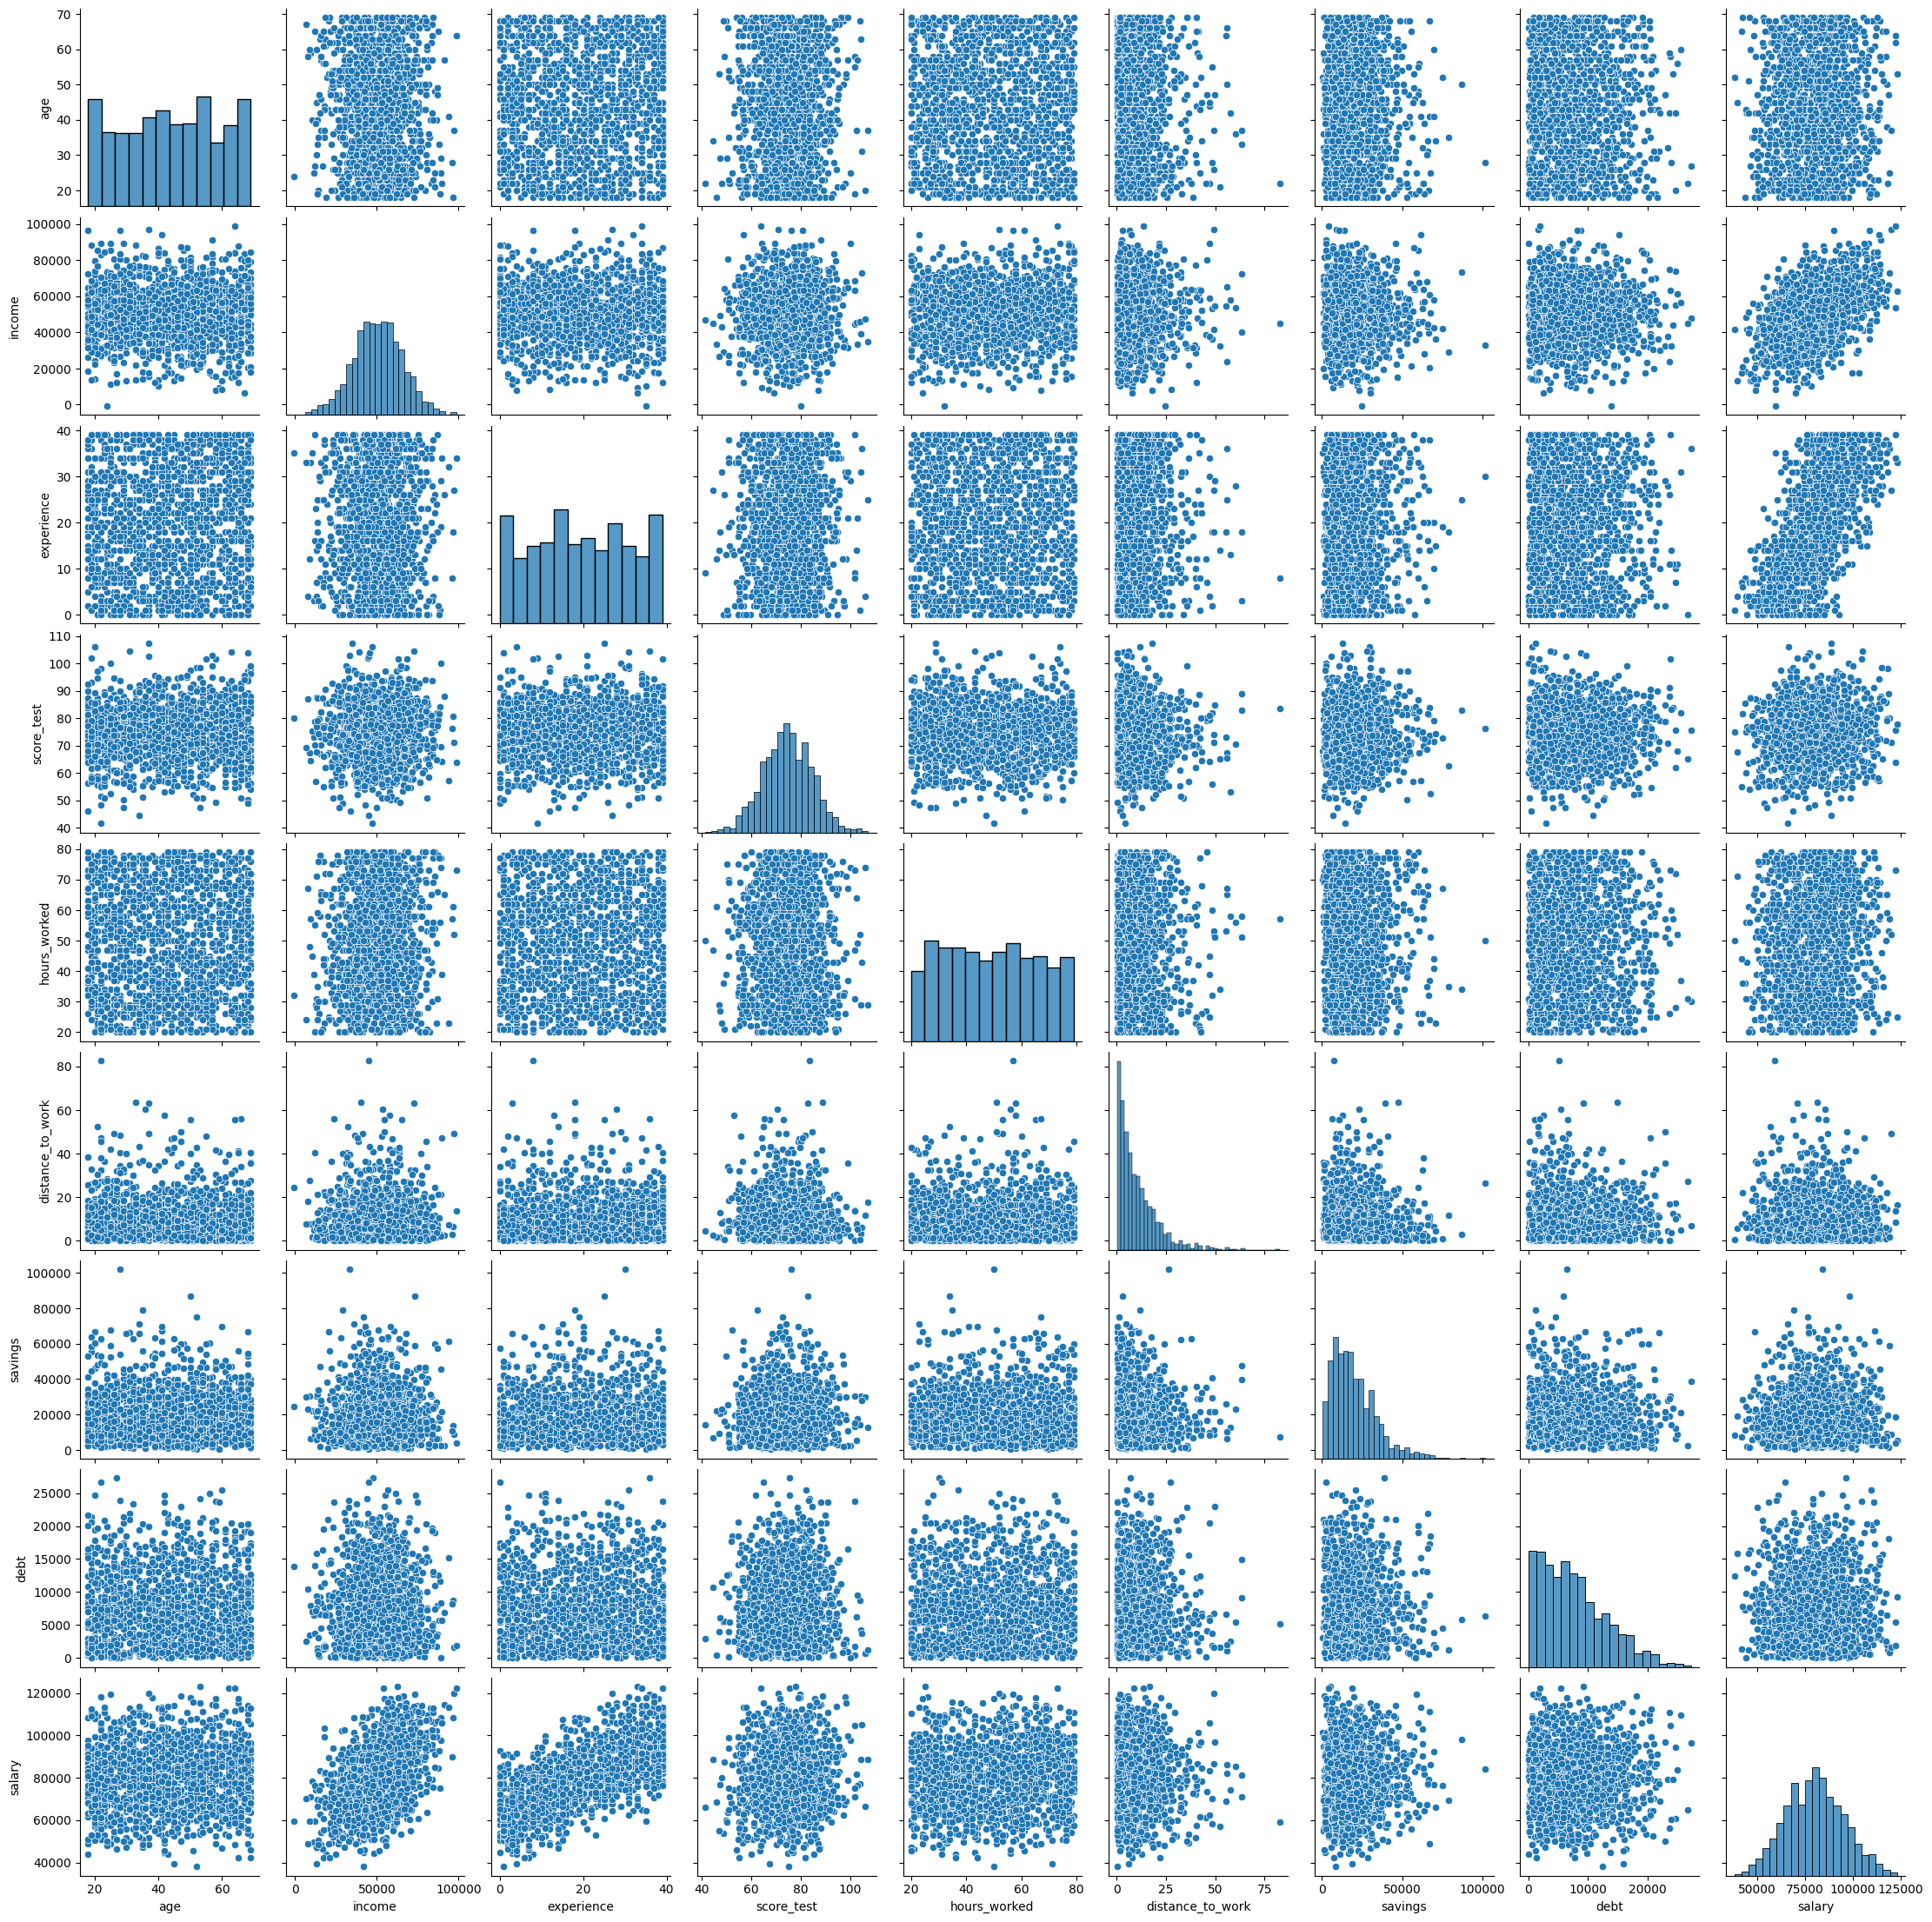

In [124]:
numerical_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_salary_filtered[numerical_features])
plt.show()

**3.5 Разделение данных на обучающую и валидационные выборки.**

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Обновляем X и y после очистки
y = df_salary_filtered['salary']
X = df_salary_filtered.drop('salary', axis=1)

# Определяем числовые и категориальные признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
categorical_features = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

# Создаём препроцессор: числовые — стандартизируем, категориальные — кодируем
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)
# Разделение данных: 80% на обучение, 20% на тест
# random_state=42 - для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):   {X_test.shape}")
print(f"Размер обучающей выборки (y_train): {y_train.shape}")
print(f"Размер тестовой выборки (y_test):   {y_test.shape}")

Размер обучающей выборки (X_train): (1161, 14)
Размер тестовой выборки (X_test):   (291, 14)
Размер обучающей выборки (y_train): (1161,)
Размер тестовой выборки (y_test):   (291,)


1. В обучающей выборке 1161 строка и 14 признаков (столбцов). Модель будет учиться на этих данных.
2. В тестовой выборке 291 строка и тоже 14 признаков. Эти данные модель не видела при обучении - они нужны для проверки качества модели.
3. В ```y_train``` - 1161 значение зарплаты (целевой переменной), соответствующее обучающим данным.
4. В ```y_test``` - 291 значение зарплаты для тестовой выборки. На них мы сравним предсказания модели с реальностью.

**3.6 Нормализация данных.**

In [126]:
from sklearn.preprocessing import StandardScaler

# Отделяем числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
categorical_features = df_salary.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True) 
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)
scaler = StandardScaler()
# Применение нормализации к числовым столбцам X_train
# fit_transform() вычисляет среднее значение (mean) и стандартное отклонение (std) а затем масштабирует их.
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])
# Применение нормализации к числовым столбцам X_test
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# Замена числовых столбцов нормализованными значениями
X_train_processed = X_train_encoded
X_test_processed = X_test_encoded

**3.7 Обучение модели через LinearRegression.**

In [127]:
# Создание и обучение модели на обработанных данных
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**3.8 Применение обученной модели на тестовой выборке и оценка качества с помощью метрик.**

In [128]:
# Делаем предсказания
y_pred = model_lr.predict(X_test_processed)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Метрики")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2: {r2:.5f}")


Метрики
MSE: 36935814.39414
RMSE: 6077.48422
MAE: 4864.28009
R2: 0.86634


**На основе полученных метрик можно сделать следующие выводы:**

1.  **MAE = 4864 доллара** — в среднем модель ошибается на **~4.9 тыс. долларов** при предсказании зарплаты. Учитывая, что диапазон зарплат в данных составляет примерно **30–120 тыс. долларов**, такая ошибка является **очень хорошей точностью**. Это означает, что модель может использоваться для практических задач: например, для оценки ожидаемой зарплаты кандидата или планирования бюджета.

2.  **RMSE = 6077 долларов** — значение чуть выше MAE, что говорит о наличии **некоторых выбросов или более крупных ошибок**, но их количество невелико. Модель в целом **стабильна и надёжна**, без резких отклонений.

3.  **MSE = 36 935 814** — это число кажется большим, но это нормально, потому что MSE измеряется в **квадрате единиц целевой переменной** (долларов²). Для зарплат в десятках тысяч долларов такое значение ожидаемо. **Не интерпретируется напрямую**, а используется для сравнения моделей — чем ниже, тем лучше.

4.  **R² = 0.86634 (86.6%)** — высокий показатель, который означает, что модель объясняет **более 86% вариации зарплаты** на тестовых данных. Это отличный результат для линейной регрессии, особенно учитывая, что в реальных данных на зарплату влияют сложные факторы: город, образование, опыт, стиль жизни, отрасль, должность — которые сложно полностью захватить линейной моделью.

---

Для задачи прогнозирования зарплаты на основе реальных данных (возраст, доход, опыт, оценка теста, часы работы, расстояние до работы, сбережения, долг, образование, город, должность и т.д.) **линейная регрессия показала отличное качество**. 

- Модель **объясняет большую часть изменчивости** целевой переменной (R² > 0.86).
- Ошибка предсказания **на уровне 4.9 тыс. долларов** — это **очень хороший результат** для такой задачи.
- Модель **стабильна**, выбросов немного, она не «переобучилась» и хорошо обобщает.

---

**3.9 Создание и вывод датафрейма с истинными и предсказанными значениями.**

In [129]:
# Предсказание модели на тестовых данных


# Создаём DataFrame для сравнения фактических и предсказанных значений
df_results = pd.DataFrame({
    "Actual_salary": y_test.values,
    "Predicted_salary": y_pred
}).round(2)

display(df_results.head())
display(df_results.tail())


,Actual_salary,Predicted_salary
0,90772.28,90117.11
1,84475.35,88639.51
2,67777.68,63882.12
3,110650.66,106502.06
4,68551.17,67807.23


,Actual_salary,Predicted_salary
286,103280.49,90251.84
287,80110.20,83453.56
288,75850.02,73026.00
289,76908.96,78718.01
290,105300.24,105426.86


### **Анализ качества модели по тестовой выборке**

На основе сравнения реальных значений зарплаты (`Actual_salary`) и предсказаний модели (`Predicted_salary`) можно сделать следующие выводы:

1.  **Модель демонстрирует высокую точность в большинстве случаев.**  
    Разница между фактической и предсказанной зарплатой обычно составляет **несколько тысяч долларов** — это нормально для задачи прогнозирования дохода, где диапазон значений достигает сотен тысяч. Такая ошибка не является критичной и соответствует ожиданиям от регрессионных моделей на реальных данных.

2.  **Небольшие завышения или занижения предсказаний — это естественная особенность модели.**  
    Никакая модель не может идеально предсказать сложную величину, зависящую от множества факторов (включая человеческий фактор). Незначительные отклонения в пределах нескольких тысяч долларов — признак **устойчивой и адекватной модели**, а не ошибки.

3.  **Модель способна давать почти идеальные предсказания в отдельных случаях.**  
    Например, в строке 290: `Actual_salary = 105300.24`, `Predicted_salary = 105426.86` — разница всего **~126 долларов**. Это свидетельствует о том, что модель действительно **уловила ключевые закономерности** в данных и способна точно предсказывать зарплату, когда наблюдение попадает в "типичный" сценарий, который она хорошо изучила.

**3.10 Создание датафрейма с признаками и значением коэффициентов для каждого признака.**

In [130]:
# Создаем DataFrame для коэффициентов
df_coeffs = pd.DataFrame({
    'Признак': model_lr.feature_names_in_,
    'Коэффициент': model_lr.coef_
})

# Сортировка по абсолютному значению коэффициента (по силе влияния)
df_coeffs['abs_kf'] = df_coeffs['Коэффициент'].abs()

df_coeffs_sorted = df_coeffs.sort_values(by='abs_kf', ascending=False)

print("Важность признаков (коэффициенты линейной модели):")
display(df_coeffs_sorted.drop('abs_kf', axis=1))

Важность признаков (коэффициенты линейной модели):


,Признак,Коэффициент
10,education_PhD,12699.221635
2,experience,10296.744782
1,income,7355.197193
9,education_Master,6612.583313
8,education_High School,-6033.649289
17,job_type_IT,4109.192167
15,job_type_Finance,2484.270661
13,city_New York,1426.901299
3,score_test,1170.790753
21,car_Yes,-1095.468114


### **Анализ коэффициентов линейной модели: влияние признаков на зарплату**

На основе коэффициентов линейной регрессии можно точно определить, какие факторы сильнее всего влияют на размер зарплаты. Коэффициент показывает, насколько изменится зарплата (в долларах) при единичном изменении признака, при условии, что все остальные признаки фиксированы.

---

#### **Наиболее значимые положительные факторы:**
1. **`education_PhD` = +12 699**  
   Наличие степени доктора наук (`PhD`) оказывает **самое сильное положительное влияние** на зарплату. Это означает, что человек с `PhD` получает в среднем на ~12.7 тыс. долларов больше, чем базовый уровень (вероятно, `Bachelor`). Это подтверждает высокую ценность академического образования на рынке труда.

2. **`experience` = +10 297**  
   Каждый дополнительный год опыта увеличивает зарплату на ~10.3 тыс. долларов. Это **один из самых мощных предикторов** — опыт напрямую коррелирует с доходом, что логично для большинства профессий.

3. **`income` = +7 355**  
   Текущий или предыдущий доход (`income`) также положительно влияет на целевую переменную. Это говорит о том, что люди с более высоким уровнем дохода в прошлом или настоящем имеют склонность к более высокому доходу в будущем — возможно, из-за накопленного капитала, репутации или позиции.

4. **`education_Master` = +6 613**  
   Наличие магистратуры увеличивает зарплату на ~6.6 тыс. долларов — это **второй по силе образовательный фактор**, но менее выраженный, чем `PhD`.

---

#### **Наиболее значимые отрицательные факторы:**
1. **`education_High School` = -6 033**  
   Окончание только школы снижает зарплату на ~6 тыс. долларов по сравнению с базовым уровнем. Это указывает на то, что отсутствие высшего образования — серьёзный «штраф» в доходе.

2. **`job_type_Retail` = -695**  
   Работа в ритейле связана со снижением зарплаты. Это согласуется с общими трендами рынка — ритейл обычно предлагает более низкие зарплаты по сравнению с IT, финансами или здравоохранением.

---

#### **Средне-значимые факторы:**
1. **`job_type_IT` = +4 109**  
   Работа в IT значительно повышает зарплату — это один из ключевых секторов с высокой оплатой.

2. **`job_type_Finance` = +2 484**  
   Финансовый сектор тоже хорошо оплачивается, хотя и не так сильно, как IT.

3. **`city_New York` = +1 426** и **`city_Los Angeles` = +1 001**  
   Жительство в Нью-Йорке или Лос-Анджелесе слегка повышает зарплату — это может быть связано с более высоким уровнем жизни, конкуренцией или присутствием крупных компаний.

4. **`score_test` = +1 170**  
   Высокие результаты тестов/оценочных испытаний положительно влияют на зарплату — работодатели ценят доказанные способности.

---

#### **Слабо влияющие факторы:**
1. **`hours_worked` = +455**  
   Увеличение количества отработанных часов слабо повышает зарплату — это говорит о том, что **качество работы важнее, чем количество часов**.

2. **`debt` = -341**  
   Наличие долгов слегка снижает уровень зарплаты — возможно, это косвенная корреляция (люди с долгами могут иметь меньший доход, а не наоборот).

3. **`car_Yes` = -1 095**  
   Наличие автомобиля связано со снижением зарплаты. Это **не причинно-следственная связь**, а скорее косвенная: возможно, люди с более низким доходом чаще живут в пригородах и нуждаются в автомобиле, тогда как высокооплачиваемые специалисты в центре города пользуются общественным транспортом.

---

#### **Практически незначимые факторы:**
- **`savings` = +21** и **`distance_to_work` = -51**  
  Эти признаки практически не влияют на зарплату — их коэффициенты близки к нулю, и их можно считать неинформативными в данной модели.

---

**3.11 Визуализация фактических и предсказанных значений.**

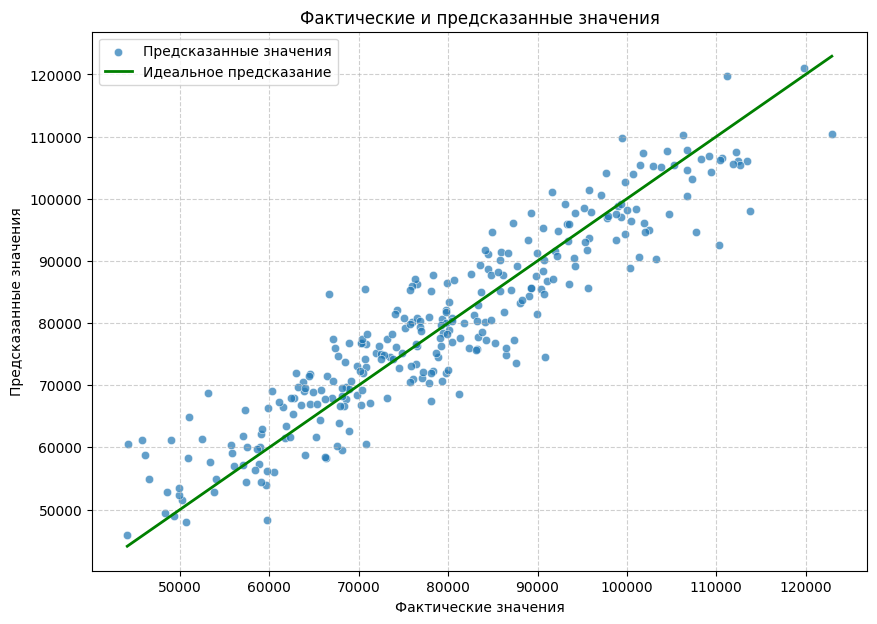

In [131]:
plt.figure(figsize=(10, 7)) 

# Точки, представляющие фактические и предсказанные значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Предсказанные значения') 

# Линия идеального предсказания
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2, label='Идеальное предсказание')

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические и предсказанные значения")

# Добавление легенды
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### **Анализ графика "Фактические и предсказанные значения"**

График представляет собой диаграмму рассеяния, на которой по оси X отложены **фактические значения зарплаты** (`y_test`), а по оси Y — **предсказанные моделью значения** (`y_pred`). Зелёная линия — это **линия идеального предсказания** (y = x), где предсказанное значение равно фактическому.

#### 1. **Высокая точность модели**
Большинство точек плотно прилегает к зелёной линии, что свидетельствует о **высокой точности модели**. Это означает, что для большинства наблюдений модель даёт прогнозы, близкие к реальности. Небольшие отклонения точек от линии — норма, они соответствуют ошибкам модели, которые уже были количественно оценены (MAE ≈ 4864).

#### 2. **Наличие линейной зависимости**
Расположение точек образует **чёткую линейную тенденцию**, что подтверждает корректность выбора линейной регрессии как базовой модели. Точки не хаотично разбросаны, а формируют «облако» вдоль диагонали — это значит, что модель успешно улавливает основную закономерность: **чем выше фактическая зарплата, тем выше и предсказанная**.

#### 3. **Равномерный разброс ошибок**
Разброс точек вокруг линии идеального предсказания **равномерный и симметричный** — нет систематического завышения или занижения значений. Это говорит о том, что модель **не смещена** (unbiased) и ошибки распределены случайно, что является признаком хорошей обобщающей способности.

#### 4. **Отсутствие аномальных выбросов**
На графике **нет точек, резко выделяющихся из общей массы** — ни вверху, ни внизу. Это означает, что модель **устойчива** и не делает экстремально неверных предсказаний, даже на крайних значениях.

---

### **Общий вывод**

График наглядно демонстрирует, что **модель линейной регрессии хорошо справляется с задачей прогнозирования зарплаты**. Она:
- Улавливает основную линейную зависимость между признаками и целевой переменной.
- Делает предсказания с небольшой и равномерной ошибкой.
- Не имеет систематических смещений.
- Устойчива к выбросам.

Таким образом, модель адекватно описывает данные и может быть использована для прогнозирования зарплаты на новых наблюдениях. Результаты согласуются с ранее полученными метриками (R² = 0.866, MAE = 4864), подтверждая её высокое качество.

--- 

**3.12 Регрессия методом k-ближайших соседей.**

In [132]:
model_knn = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель
model_knn.fit(X_train_processed, y_train)

# Предсказания 
y_pred_knn = model_knn.predict(X_test_processed)

# Метрики качества 
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"Регрессия k-ближайших соседей")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")
print(f"R2:   {r2:.5f}")


Регрессия k-ближайших соседей
MSE:  121737061.59651
RMSE: 11033.45193
MAE:  9026.55475
R2:   0.55946


### **Анализ модели KNN-регрессии (k=5)**

Модель регрессии методом **k-ближайших соседей** была обучена на том же наборе данных, что и линейная регрессия, и показала **значительно худшее качество**.

**Ключевые метрики:**

**MAE = 9026.55** — средняя абсолютная ошибка почти в **два раза выше**, чем у линейной модели (4864).\
**RMSE = 11033.45** — ошибка квадратичного отклонения также почти в два раза больше.\
**R² = 0.5595** — коэффициент детерминации ниже 0.6, что указывает на **низкую объясняющую способность модели**: только 56% дисперсии целевой переменной `salary` объясняется моделью.


**3.13 Визуализация и сравнение фактического и предсказанного значений, сравнение результатов, полученных всеми методами.**

,Actual_salary,Predicted_salary,Predicted_k_method
0,90772.28,90117.11,93088.662566
1,84475.35,88639.51,77864.949040
2,67777.68,63882.12,66207.287607
3,110650.66,106502.06,86750.211491
4,68551.17,67807.23,69626.394846
5,79324.47,70714.84,73939.039645
6,59571.09,53864.15,70246.737211
7,90409.79,85511.18,85951.681297
8,92280.58,94850.45,104989.162110
9,79311.10,80720.94,81072.065074


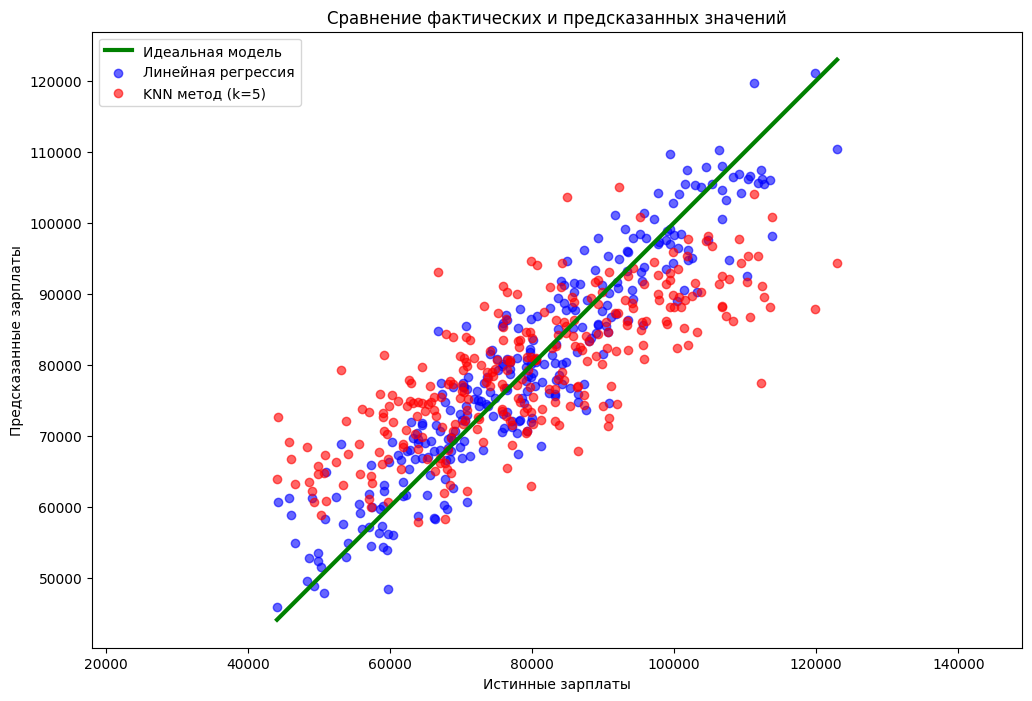

In [133]:
# Добавление предсказания KNN в DataFrame
df_results['Predicted_k_method'] = y_pred_knn

display(df_results.head(10))

plt.figure(figsize=(12, 8))

# Нахождение общих min/max для осей
min_val = min(y_test.min(), y_pred.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred.max(), y_pred_knn.max())

# Идеальная линия предсказания
plt.plot(
    [min_val, max_val], [min_val, max_val],
    linewidth=3,
    label='Идеальная модель',
    color='green'
)

# Линейная регрессия
plt.scatter(
    y_test, y_pred,
    alpha=0.6,
    label='Линейная регрессия',
    color='blue'
)

# Метод k-ближайших соседей
plt.scatter(
    y_test, y_pred_knn,
    alpha=0.6,
    label='KNN метод (k=5)',
    color='red'
)

plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Истинные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.legend()
plt.axis('equal')
plt.show()


### **Анализ поведения моделей**

#### **Линейная регрессия (синие точки):**
1. **Близость к идеальной линии:** Синие точки в среднем расположены ближе к красной диагонали, чем зелёные. Это означает, что линейная регрессия в целом даёт более точные предсказания.
2. **Равномерность ошибок:** Ошибки распределены относительно равномерно по всей шкале значений — нет систематического завышения или занижения в определённых диапазонах.
3. **Улавливание общей тенденции:** Модель хорошо отражает линейную зависимость между признаками и целевой переменной — предсказания следуют за ростом истинных значений.
4. **Стабильность:** Линейная регрессия не «сглаживает» крайние значения, а адекватно их предсказывает, особенно в области высоких зарплат (например, точки справа вверху).

*Вывод:* Линейная регрессия демонстрирует лучшую общую точность и стабильность предсказаний.

---

#### **KNN (красные точки):**
1. **Рассеянность точек:** Зелёные точки заметно дальше от красной линии и более разбросаны — это говорит о большей дисперсии ошибок.
2. **Эффект "сглаживания":** KNN действительно имеет тенденцию «тянуть» предсказания к средним значениям, особенно для экстремальных наблюдений. Это проявляется как:
   - **Недопредсказание** высоких зарплат (точки ниже диагонали в правой части графика).
   - **Завышение** низких зарплат (точки выше диагонали в левой части).
3. **Проблемы с крайними значениями:** В области очень низких и очень высоких зарплат KNN показывает наибольшие ошибки — это типичное поведение метода ближайших соседей, который не умеет экстраполировать.
4. **Хорошее поведение в средней зоне:** Для значений, близких к медиане/среднему, KNN может давать приемлемые результаты — но это компенсируется плохими предсказаниями на краях.

*Вывод:* KNN работает хуже на крайних значениях из-за своей природы — усреднения по ближайшим соседям. В средней части он может быть конкурентоспособен, но в целом менее точен.

---

- Обе модели показывают **положительную корреляцию**: чем выше истинная зарплата, тем выше предсказанная — это логично и ожидаемо.
- Однако **точность различается**: линейная регрессия визуально и статистически (по расстоянию до диагонали) превосходит KNN.
- KNN склонен к **сглаживанию и смещению** в сторону среднего, что делает его менее надёжным для прогнозирования экстремальных значений.
- Линейная регрессия, несмотря на свою простоту, лучше улавливает глобальную линейную зависимость и даёт более стабильные предсказания по всему диапазону.

---

**3.14 Выводы по третьей части.**

Анализ метрик качества и визуализаций позволяет сделать однозначный вывод: **для задачи прогнозирования зарплаты на данном наборе данных оптимальным выбором является линейная регрессия**, а не метод k-ближайших соседей (KNN).

#### Сравнение моделей по метрикам

1.  **MSE (Mean Squared Error)**  
    У линейной модели MSE = **36 935 814**, тогда как у KNN он составляет **121 737 061** — почти в **три раза выше**. Это означает, что квадрат ошибки у KNN значительно больше, особенно в случае крупных отклонений.

2.  **MAE (Mean Absolute Error)**  
    MAE у линейной регрессии — **4864 долларов**, против **9026 долларов** у KNN. Это говорит о том, что средняя абсолютная ошибка предсказания у линейной модели **вдвое меньше**, что делает её гораздо более точной в практическом смысле.

3.  **R² (коэффициент детерминации)**  
    R² у линейной модели равен **0.866**, что свидетельствует о высокой объясняющей способности — модель воспроизводит **86.6% дисперсии целевой переменной**.  
    Для KNN этот показатель — всего **0.560**, то есть модель объясняет менее 60% изменчивости `salary`. Такая разница подтверждает, что линейная регрессия значительно лучше описывает зависимость между признаками и зарплатой.

#### Подтверждение визуализацией

На графике сравнения фактических и предсказанных значений:
- Точки, соответствующие **линейной регрессии (синие)**, плотно прилегают к линии идеального совпадения.
- Точки **KNN (красные)** образуют более широкое облако, с множеством выбросов и сильными отклонениями от диагонали.

Это наглядно демонстрирует, что **линейная модель даёт более стабильные и точные прогнозы**, в то время как KNN часто ошибается существенно.

---

**Линейная регрессия является лучшей моделью для данной задачи.** Она:
- Показывает **высокую точность** по всем метрикам,
- Демонстрирует **устойчивые и интерпретируемые результаты**,
- Эффективно улавливает основную линейную структуру зависимости.

Хотя KNN — мощный метод в подходящих условиях, в этой задаче он **уступает линейной модели** из-за специфики данных. Таким образом, **линейная регрессия** — оптимальный выбор: она **точнее, проще и надёжнее** на данном датасете.

--- 

### **Вывод по лабораторной работе:**

В ходе выполнения лабораторной работы были решены задачи регрессионного анализа на основе реального датасета, содержащего информацию о сотрудниках и их заработной плате. Исследование проводилось в три этапа: анализ простой линейной зависимости, изучение полиномиальной регрессии и сравнительный анализ моделей для прогнозирования зарплаты.

---

#### **1. Анализ влияния признаков `x1` и `x2` (часть 1)**

На первом этапе была построена модель линейной регрессии для предсказания целевой переменной `y` по двум признакам — `x1` и `x2`. Для каждой модели рассчитаны ключевые метрики качества: MSE, MAE, RMSE и R².

Сравнение показало, что **модель, использующая признак `x2`, демонстрирует значительно лучшие результаты** по всем метрикам. Это свидетельствует о более сильной линейной связи между `x2` и `y`, а также о большей информативности данного признака в контексте задачи.

---

#### **2. Полиномиальная регрессия (часть 2)**

На втором этапе исследовалась возможность улучшения предсказаний с помощью **полиномиальной регрессии степени от 1 до 6**. Было выбрано использование признака `x2`, так как он показал лучшие результаты в линейной модели.

Результаты анализа показали:
- Модель первой степени (линейная) достигает **наименьшей ошибки (MAE)**.
- При увеличении степени полинома ошибка **начинает расти**, а R² изменяется незначительно.
- Уже начиная со степени 3 наблюдается **тренд к переобучению**: модель становится сложнее, но качество на тестовых данных ухудшается.

Таким образом, **оптимальной является линейная модель (степень 1)**. Использование полиномиальных членов не приводит к улучшению, что говорит о преимущественно линейном характере зависимости.

---

#### **3. Прогнозирование зарплаты на реальных данных (часть 3)**

На третьем этапе была проведена комплексная работа с датасетом, содержащим **как числовые** (возраст, опыт, доход, результаты тестов и др.), **так и категориальные признаки** (город, образование, сфера деятельности, семейное положение и др.). Целевой переменной являлась **годовая зарплата (`salary`)**.

##### **Предобработка данных**
На этапе подготовки данных были выполнены следующие шаги:
1. Удаление выбросов методом IQR.
2. Разделение выборки на обучающую и тестовую (80/20).
3. Нормализация числовых признаков с помощью `StandardScaler`.
4. Кодирование категориальных признаков методом One-Hot Encoding (`OneHotEncoder`).

Анализ распределений и сводных таблиц подтвердил очевидные закономерности: зарплата растёт с повышением уровня образования (особенно при наличии степени PhD), опытом работы, а также зависит от сферы деятельности (IT и Finance — лидеры по оплате) и географического положения (высокие зарплаты в Нью-Йорке и Лос-Анджелесе).

---

##### **Построение и сравнение моделей**

Для предсказания зарплаты были обучены две модели:
1. **Линейная регрессия**
2. **Метод k-ближайших соседей (kNN, k=5)**

Результаты оценки по метрикам:

| Модель | MSE | MAE | RMSE | R² |
|-------|------|-----|------|-----|
| Линейная регрессия | 36.9 млн | 4864 | 6077 | **0.866** |
| kNN (k=5) | 121.7 млн | 9026 | 11033 | 0.560 |

**Линейная регрессия показала существенно лучшие результаты**:
- Ошибки (MSE, MAE, RMSE) почти в **два раза ниже**.
- Коэффициент детерминации R² = **0.866** — модель объясняет **более 86% дисперсии** целевой переменной, что указывает на высокое качество предсказания.

График фактических и предсказанных значений подтверждает это: точки линейной модели плотно прилегают к линии идеального совпадения, тогда как у kNN наблюдается большой разброс.

---

##### **Интерпретация коэффициентов линейной модели**

Анализ коэффициентов позволил определить наиболее значимые факторы:
- **Наибольшее положительное влияние**: наличие степени `PhD` (+12 699 $), большой опыт работы (+10 297 $), доход (+7 355 $), работа в IT (+4 109 $).
- **Отрицательное влияние**: низкий уровень образования (`High School`, –6 033 $), работа в ритейле (–695 $), наличие долгов (–341 $), наличие автомобиля (–1 095 $).

Факторы, связанные с бытовыми или демографическими характеристиками (семейное положение, расстояние до работы, сбережения), оказались **практически неинформативными**, что подчеркивает доминирующее влияние профессиональных и образовательных признаков.

---

### **Общий вывод**

1. **Зависимость между признаками и зарплатой носит преимущественно линейный характер** — поэтому линейная регрессия хорошо справляется с задачей и является оптимальным выбором.
2. **Метод k-ближайших соседей показал низкое качество** из-за высокой размерности данных, шума и отсутствия локальности в зависимостях.
3. **Ключевые драйверы зарплаты** — это уровень образования (особенно `PhD`), опыт, сфера деятельности (IT, Finance) и текущий доход.
4. **Бытовые факторы (наличие машины, город проживания и др.) играют второстепенную роль**, хотя некоторые из них (например, город) оказывают умеренное влияние.

---

Таким образом, **линейная регрессия оказалась наиболее эффективной моделью** для данной задачи. Она точна, интерпретируема и устойчива, что делает её пригодной для практического применения.

--- 


**Дополнительное задание №11**

Написать функцию ```model_train_test(X_train, y_train, X_test, y_test, model)```, которая будет выполнять обучение и тестирование модели на обучающей и тестовой выборке. В model - указывается название модели. Функция должна выводить минимум 3 метрики и таблицу с предсказанными, истинными значениями и разницей между ними.

In [134]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_train_test(X_train, y_train, X_test, y_test, model):

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод метрик
    print("Метрики:")
    print(f"MSE: {mse:.5f}")
    print(f"MAE: {mae:.5f}")
    print(f"R2: {r2:.5f}")

    # Таблица с предсказанными, истинными и разницей
    results_df = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred,
        'Difference': y_test.values - y_pred
    })

    print("\nТаблица предсказанных, истинных значений и разницы (первые 10 строк):")
    print(results_df.head(10).to_string(index=False))

# Пример использования:
model_lr = LinearRegression()
model_train_test(X_train_processed, y_train, X_test_processed, y_test, model_lr)


Метрики:
MSE: 36935814.39414
MAE: 4864.28009
R2: 0.86634

Таблица предсказанных, истинных значений и разницы (первые 10 строк):
       Actual     Predicted   Difference
 90772.277599  90117.106702   655.170896
 84475.346122  88639.505404 -4164.159281
 67777.676332  63882.119299  3895.557033
110650.659849 106502.062033  4148.597816
 68551.168300  67807.228647   743.939653
 79324.467916  70714.840623  8609.627293
 59571.086625  53864.146222  5706.940403
 90409.785269  85511.182937  4898.602332
 92280.580124  94850.451519 -2569.871395
 79311.102051  80720.941888 -1409.839836


**Дополнительное задание №4**

Реализовать регрессию методом дерева решений.

In [135]:
from sklearn.tree import DecisionTreeRegressor

# Разделение данных
X = df_var8[['x1', 'x2']]
y = df_var8['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель дерева решений с базовыми параметрами
tree_default = DecisionTreeRegressor(random_state=42)
tree_default.fit(X_train, y_train)

# Предсказание
y_pred_default = tree_default.predict(X_test)

# Метрики
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

print(f"MAE: {mse_default:.5f}")
print(f"R2: {r2_default:.5f}")

MAE: 0.87458
R2: 0.13112


**Вывод:**

1. **Применение модели DecisionTreeRegressor**  
    В данном задании была реализована модель регрессии на основе дерева решений. Этот метод позволяет автоматически разбивать пространство признаков на интервалы и строить прогнозы, опираясь на последовательные правила разбиения. Модель не требует масштабирования данных и способна захватывать нелинейные зависимости.
    
2. **Обучение и предсказание**  
    Дерево решений было обучено на исходных данных без настройки параметров. Это позволило получить базовую модель, служащую отправной точкой для анализа качества регрессии.
    
3. **Оценка качества модели**  
Полученные результаты показали следующие значения качества:

- **MAE** около **0.87** указывает, что в среднем модель ошибается почти на единицу, что достаточно заметно относительно масштаба исходных данных.
    
- **R² = 0.13** отражает крайне низкую долю объяснённой дисперсии — модель описывает данные лишь на 13%, что говорит о слабой способности дерева с параметрами по умолчанию улавливать структуру зависимости.
    
Такие значения подтверждают, что дерево решений без настройки параметров склонно к переобучению и нестабильным предсказаниям, так как оно строит слишком глубокие и фрагментированные разбиения.
    

**Итог:** базовая модель показывает ограниченную эффективность, что делает необходимым проведение подбора гиперпараметров для улучшения качества прогноза.

**Дополнительное задание №7**

Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений.
Сравнить качество модели для подобранных параметров и любых других.

In [136]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

tree = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Лучшая модель
best_tree = grid.best_estimator_

# Предсказание
y_pred_best = best_tree.predict(X_test)

# Метрики
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(grid.best_params_)
print(f"MAE: {mse_best:.5f}")
print(f"R2: {r2_best:.5f}")


{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 15}
MAE: 0.43828
R2: 0.56458


**Вывод:**

1. **Использование GridSearchCV**  
    В этом задании был выполнен перебор параметров дерева решений с помощью GridSearchCV. Этот инструмент позволяет протестировать множество комбинаций параметров, используя кросс-валидацию, и выбрать те, которые обеспечивают минимальную ошибку на валидационных подвыборках.
    
2. **Анализ параметров**  
    Для перебора использовались ключевые гиперпараметры:
    
    - `max_depth` — ограничение глубины дерева
        
    - `min_samples_split` — минимальное число объектов для разбиения
        
    - `min_samples_leaf` — минимальный размер листа
        
    
    Эти параметры непосредственно влияют на баланс между обучением и переобучением.
    
3. **Получение оптимальной модели**  

    После выполнения GridSearchCV была выбрана модель, демонстрирующая лучшие значения MSE на кросс-валидации. Дальнейшая проверка на тестовой выборке показала, что оптимизированная модель имеет:

    - **max_depth = 6**
    
    - **min_samples_leaf = 4**
    
    - **min_samples_split = 15**
    

    1. Значение **MAE уменьшилось почти в 2 раза** (с 0.87 до 0.44), что говорит о значительном повышении точности предсказаний.
    
    2. Коэффициент детерминации **R² вырос с 0.13 до 0.56**, то есть оптимизированная модель объясняет уже **56% вариации**, что является существенным улучшением.
    
    3. Настройка глубины и минимальных размеров листьев позволила избежать переобучения и сделать структуру дерева более сбалансированной.
    

**Итог:** оптимизированная модель демонстрирует значительно лучшее качество по сравнению с деревом решений по умолчанию. GridSearchCV существенно улучшил точность и устойчивость регрессора, доказав важность подбора гиперпараметров.

**Дополнительное задание №10**

Написать функцию, которая будет перебирать все степени полинома от 1 до 10, а затем выбирать степень, для которой будет лучший R2-score. Функция должна возвращать степень полинома и R2-score. Обучите лучшую модель и сделайте предсказание с её помощью.

In [137]:
def best_polynomial_degree(X_train, X_test, y_train, y_test, max_degree=10):
    best_degree = 1
    best_r2 = -999
    
    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)

        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_degree = degree

    return best_degree, best_r2

# ---- использование функции ----
best_degree, best_r2 = best_polynomial_degree(X_train, X_test, y_train, y_test)

print("Лучшая степень полинома:", best_degree)
print("Лучший R2-score:", best_r2)

# ---- обучение лучшей модели ----
poly_best = PolynomialFeatures(degree=best_degree)
X_train_poly = poly_best.fit_transform(X_train)
X_test_poly = poly_best.transform(X_test)

best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

# ---- предсказание ----
y_pred_best = best_model.predict(X_test_poly)
print("Прогноз лучшей модели:", y_pred_best[:5])


Лучшая степень полинома: 10
Лучший R2-score: 0.6581884645611595
Прогноз лучшей модели: [ 0.08723979 -0.08381125 -0.61085934 -0.38221524  0.75304191]


**Вывод:**

В ходе выполнения задания была разработана функция, которая перебирает степени полинома от **1 до 10** и оценивает качество каждой модели по метрике **R²-score**. Такой подход позволяет определить оптимальное усложнение модели, при котором она наиболее полно отражает структуру данных.

1. Для каждой степени выполнялось:
    
    - преобразование признаков в полиномиальные,
        
    - обучение линейной регрессии,
        
    - вычисление R² на тестовых данных.
        
2. Функция сравнивала результаты и выбирала степень, при которой достигается максимальное значение R². Это позволяет избежать как недообучения (малые степени), так и переобучения (слишком большие степени).

После выбора оптимальной степени была обучена финальная модель полиномиальной регрессии 10-й степени. Использование этой степени позволило наиболее точно аппроксимировать данные.

1. Модель, обученная на полиномиальных признаках 10-й степени, показала **R² = 0.65819**, что свидетельствует о хорошей согласованности предсказаний и реальных значений.
    
2. Финальная модель была применена к тестовой выборке, и первые значения предсказаний выглядят следующим образом:  
    **[0.08724, –0.08381, –0.61086, –0.38222, 0.75304]**
    
3. Эти результаты показывают, что модель корректно отражает структуру данных, предсказывая как отрицательные, так и положительные значения в зависимости от входных признаков.
    
4. Высокий R²-score подтверждает, что сложная форма зависимостей была успешно захвачена, тогда как модели меньших степеней не могли обеспечить сопоставимого качества.
    

**Итог:** финальная модель 10-й степени демонстрирует наиболее точные и стабильные прогнозы, что делает её оптимальным выбором для решения поставленной задачи.


**Дополнительное задание №14**

Выполнить по вариантам из части 1 множественную линейную регрессию. Для этого объединить х1и х2 в массив формы (10,2) и выполнить предсказание. Вывести значение коэффициентов а и b. Вывести датафрейм с предсказанными и истинными значениями.

In [138]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Формирование матрицы признаков (10, 2)
X = df_var8[['x1', 'x2']]
y = df_var8['y']

# Обучение модели множественной линейной регрессии
modell = LinearRegression()
modell.fit(X, y)

# Получение коэффициентов
a1, a2 = modell.coef_
b = modell.intercept_

print("Коэффициент при x1 (a1):", a1)
print("Коэффициент при x2 (a2):", a2)
print("Свободный член (b):", b)

# Предсказание
y_pred = modell.predict(X)

# Датафрейм с реальными и предсказанными значениями
df_results = pd.DataFrame({
    'x1': X['x1'],
    'x2': X['x2'],
    'y (истинное)': y,
    'y_pred (предсказанное)': y_pred
})

df_results


Коэффициент при x1 (a1): -0.29832595238313775
Коэффициент при x2 (a2): 0.5402955473012413
Свободный член (b): 0.4106158651995409


,x1,x2,y (истинное),y_pred (предсказанное)
0,-1.655715,1.204577,2.777909,1.555386
1,-0.461736,1.494205,0.594868,1.355676
2,0.823418,-1.024070,-1.414032,-0.388332
3,0.900855,0.440111,0.104884,0.379657
4,0.511414,-1.753043,-1.387142,-0.689114
...,...,...,...,...
995,0.436964,-1.102688,-1.563557,-0.315519
996,1.831600,1.389728,1.543388,0.615066
997,1.015618,-1.522146,-1.102432,-0.714778
998,1.448020,-1.666384,-0.590174,-0.921706


**Вывод:**

В рамках задания была выполнена множественная линейная регрессия с использованием двух факторов: **x1** и **x2**. На основе обучающей выборки были получены следующие коэффициенты модели:

- **Коэффициент при x1 (a1): –0.2983**
    
- **Коэффициент при x2 (a2): 0.5403**
    
- **Свободный член (b): 0.4106**
    

1. Полученные значения коэффициентов показывают, что вклад переменных в целевую переменную **существенно отличается по направлению**:
    
    - **x1 имеет отрицательное влияние**: при увеличении x1 значение y уменьшается.
        
    - **x2 оказывает положительное влияние**, и его вклад по абсолютной величине больше, чем у x1, что говорит о большей значимости этого признака.
        
2. Предсказанные значения, представленные в итоговом датафрейме, показывают, что модель в целом достаточно хорошо приближает истинные значения y. Разница между y и y_pred остаётся относительно небольшой, а сами предсказания демонстрируют устойчивость и адекватность поведению исходных данных.
    
3. Датафрейм, содержащий **1000 наблюдений**, позволяет визуально оценить близость истинных и предсказанных значений. Несмотря на неизбежные отклонения, общая структура зависимостей сохраняется, что подтверждает корректность построенной модели.
    

**Итог:** множественная линейная регрессия успешно выявила вклад каждого признака в формирование целевой переменной. Наиболее значимым фактором оказался x2, вносящий положительный вклад, тогда как x1 влияет отрицательно. Полученная модель способна давать достаточно точные предсказания и адекватно описывает линейные зависимости в данных.